# Decision Tree (Entropy / Information Gain) from Scratch — Breast Cancer Dataset

In this notebook we will:

1. Use **scikit-learn** to **load data** and **split** into train/test sets.
2. Use a **from-scratch** decision tree classifier (`decision_tree` in `decision_tree.py`) that:
   - assumes **numeric features**
   - uses **entropy** and **information gain** to choose splits
   - performs **binary threshold splits** (`x_j <= t` vs `x_j > t`)
3. Evaluate performance with **accuracy** (and optionally a confusion matrix).


## 1) Imports

We import:
- `sklearn.datasets` to load the Breast Cancer Wisconsin dataset
- `sklearn.model_selection.train_test_split` to create train/test sets
- `sklearn.metrics` for evaluation
- The `decision_tree` class from `rice_ml.supervised_learning.decision_tree`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from rice_ml.supervised_learning.decision_tree import decision_tree

## 2) Load dataset with scikit-learn

The breast cancer dataset has:
- **Features**: numeric measurements computed from digitized images of fine needle aspirates of breast masses
- **Target**: two classes (malignant vs benign), encoded as 0/1

We'll load it using `load_breast_cancer()`.


In [2]:
data = load_breast_cancer()
X = data.data          # shape: (n_samples, n_features)
y = data.target.astype(float)  # our tree expects numeric labels; float is fine

feature_names = data.feature_names
target_names = data.target_names

print('X shape:', X.shape)
print('y shape:', y.shape)
print('target names:', target_names)



X shape: (569, 30)
y shape: (569,)
target names: ['malignant' 'benign']


We can also import the breast cancer data as a data frame to better see what it looks like in tabular form

In [3]:
df = load_breast_cancer(as_frame=True)
df.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3) Train/test split

We use `train_test_split` with `stratify=y` so the class balance is similar in both splits.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((455, 30), (114, 30))

## 4) Train the decision tree

Key hyperparameters you can tune:

- `max_depth`: limits tree depth (helps prevent overfitting)
- `min_samples_split`: minimum samples needed to *attempt* a split
- `min_samples_leaf`: minimum samples required in each leaf
- `min_impurity_decrease`: require at least this much info gain to split
- `n_features`: feature subsampling per split (like a Random Forest-style trick)

We'll start with a reasonable baseline.


In [5]:
tree = decision_tree(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    n_features=None,
    random_state=42,
    min_impurity_decrease=0.0
)

tree.fit(X_train, y_train)



decision_tree(max_depth=5, min_samples_split=2, min_samples_leaf=1, n_features=None, random_state=42, min_impurity_decrease=0.0) [fitted]

## 6) Predict and evaluate

We’ll evaluate with:
- **Accuracy**
- **Confusion matrix**
- **Classification report** (precision/recall/F1)

Note: our tree returns labels as floats (e.g., `0.0` and `1.0`)
We call `y_pred = tree.predict(X_test)` to run our tree on our testing data.

We use `accuracy_score` from `sklearn` to determine our model's performance. We see that we have **~92.98%** accuracy. We also can look at our confusion matrix **cm** to see that we are quite accurate at classifying our testing data. 


In [6]:
y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.9298245614035088

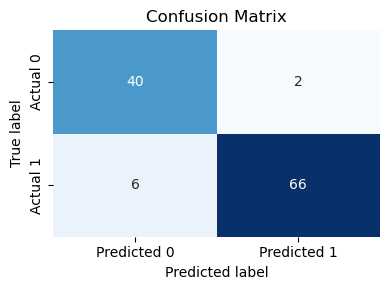

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,          # write values in cells
    fmt="d",             # integer formatting
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [8]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        42
      benign       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## 7) Feature importances (information-gain based)

Our implementation tracks total information gain per feature across the tree and normalizes it to sum to 1.

This is a simple “importance” heuristic: features that frequently create strong entropy reductions get higher scores.

We see that `mean texture` has by far the highest amount of total information for a given feature. 

In [9]:
importances = tree.feature_importances_
top_idx = np.argsort(importances)[::-1][:10]

list(zip(feature_names[top_idx], importances[top_idx]))

[(np.str_('mean texture'), np.float64(0.44937884778562653)),
 (np.str_('texture error'), np.float64(0.14733750523901049)),
 (np.str_('worst radius'), np.float64(0.11896411269602028)),
 (np.str_('worst perimeter'), np.float64(0.10449185914494094)),
 (np.str_('worst concave points'), np.float64(0.07604805752079981)),
 (np.str_('worst smoothness'), np.float64(0.06824403382832785)),
 (np.str_('worst concavity'), np.float64(0.023415232910567844)),
 (np.str_('area error'), np.float64(0.007226075937568611)),
 (np.str_('worst texture'), np.float64(0.004894274937137557)),
 (np.str_('worst compactness'), np.float64(0.0))]

## 8) Trying new parameter setting

Now we will provide some example of using the `decision_tree` with different parameter combinations. 
We can note if we change the parameters as follows we can expect certain phenomena.
1. Increasing `max_depth`can lead to overfitting 
2. Increasing `min_samples_leaf` can lead force simpler leaves to be made


In the example below with `max_depth=10` we get an accuracy score of about **92.11%** which is marginally lower than our model with `max_depth=5`

0.9210526315789473


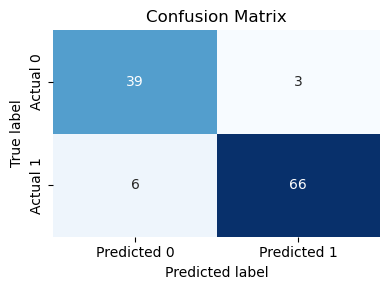

In [10]:
# Example: try a different configuration
tree2 = decision_tree(max_depth=10, min_samples_leaf=5, random_state=42)
tree2.fit(X_train, y_train)
y_pred2 = tree2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,          # write values in cells
    fmt="d",             # integer formatting
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

Once again if we increased `max_depth` to `max_depth=20` get almost no change in our accuracy score and our confusion matrix remains the same relative to the prior example. 

0.9210526315789473


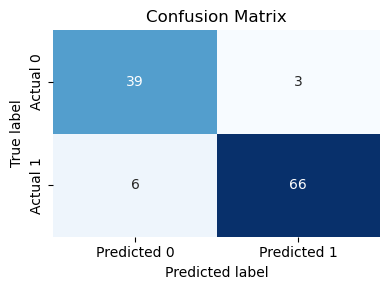

In [11]:
tree3 = decision_tree(max_depth=20, min_samples_leaf=5, random_state=42)
tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,          # write values in cells
    fmt="d",             # integer formatting
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

Here we change `min_samples_leaf` to `min_samples_leaf=3` (change from `min_samples_leaf=4`) and we see a larger change in our confusion matrix where more cases of benign (`1`) are being predicted to be malignant (`0`).

0.9122807017543859


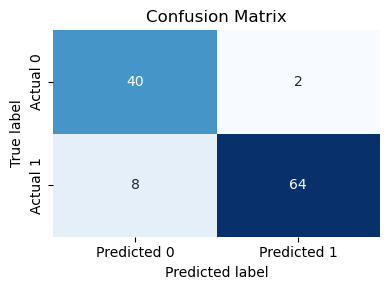

In [12]:
tree4 = decision_tree(max_depth=8, min_samples_leaf=3, random_state=42)
tree4.fit(X_train, y_train)
y_pred4 = tree4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,          # write values in cells
    fmt="d",             # integer formatting
    cmap="Blues",
    cbar=False,
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()